In [1]:
from csv import reader, DictReader

In [2]:
csv_file = "results/results.csv"

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [20]:
def strip_cols(df):
    newcols = []
    for i, col in enumerate(df.columns):
        newcol = col.strip()
        newcols.append(newcol)
    df.columns = newcols

In [21]:
def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], axis=0, ignore_index=True)

In [7]:
path = os.getcwd()
fmask = os.path.join(path, 'results/*.csv')
print(fmask)
df = get_merged_csv(glob.glob(fmask), delimiter=";")
strip_cols(df)
df

/Users/peterholzner/Code/amp/project/Code/results/*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count,fcfs_fail_count,lru_fail_count,anc,thp_runtime,thp,thp_anc,bm_runtime
0,Lamport_Lecture_fix,2,10000,30,80000,0,0,0,0,0.863508,23161.4000,1.00175,3.48768
1,Lamport_Lecture_fix,3,6800,30,81600,0,0,0,0,0.908789,22447.5000,2.00255,3.63361
2,Lamport_Lecture_fix,4,5000,30,80000,0,0,8,0,0.929614,21514.3000,3.00635,3.87081
3,Lamport_Lecture_fix,5,4000,30,80000,0,0,18,0,78.710100,254.0970,4.38460,316.21200
4,Lamport_Lecture_fix,6,3000,30,72000,0,0,9,0,133.693000,134.6370,5.56661,523.57500
5,Lamport_Lecture_fix,7,2000,30,56000,0,0,14,0,143.048000,97.8696,6.58293,546.59300
6,Lamport_Lecture_fix,8,1000,30,32000,0,0,18,0,99.593600,80.3265,7.36587,341.97000
7,Jayanti,2,100000,30,800000,0,0,32,0,10.027300,19945.6000,1.01666,42.74730
8,Jayanti,3,66666,30,799992,0,0,51,0,9.428880,21211.2000,2.00786,38.14130
9,Jayanti,4,50000,30,800000,0,0,52,0,9.366280,21353.2000,3.00642,41.90530


In [8]:
df.columns

Index(['lock_name', 'num_threads', 'num_turns', 'num_tests', 'num_events',
       'mutex_fail_count', 'fcfs_fail_count', 'lru_fail_count', 'anc',
       'thp_runtime', 'thp', 'thp_anc', 'bm_runtime'],
      dtype='object')

In [9]:
def plot_col(df, x_col="num_threads", y_col="mutex_fail_count", title=None, norm=False):
    if not title:
        title = y_col + " over " + x_col
    locks = df["lock_name"].unique()
    plt.figure(figsize=(14,8))

    for lock in locks:
        x, y = df[df["lock_name"]==lock][x_col], df[df["lock_name"]==lock][y_col]
        if norm:
            y /= df[df["lock_name"]==lock]["num_events"]*4
        plt.plot(x, y, label=lock, marker="x", linewidth=2)
    plt.grid()
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    xticks = np.arange(x.min(), x.max()+1, 1)
    plt.xticks(ticks=xticks);
    plt.suptitle(title, fontsize=28, fontweight="bold");

# Mutex failures over nthreads

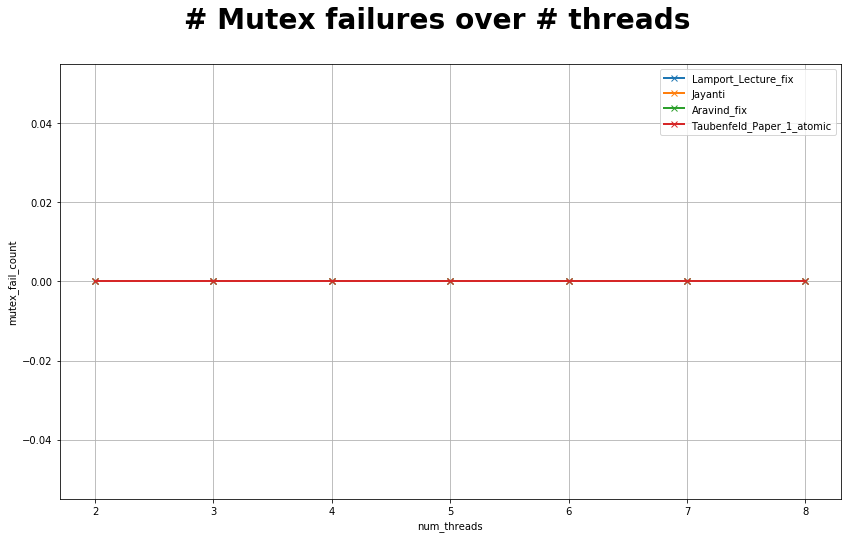

In [10]:
plot_col(df, x_col="num_threads", y_col="mutex_fail_count", title="# Mutex failures over # threads", norm=False)

# FCFS failures over nthreads

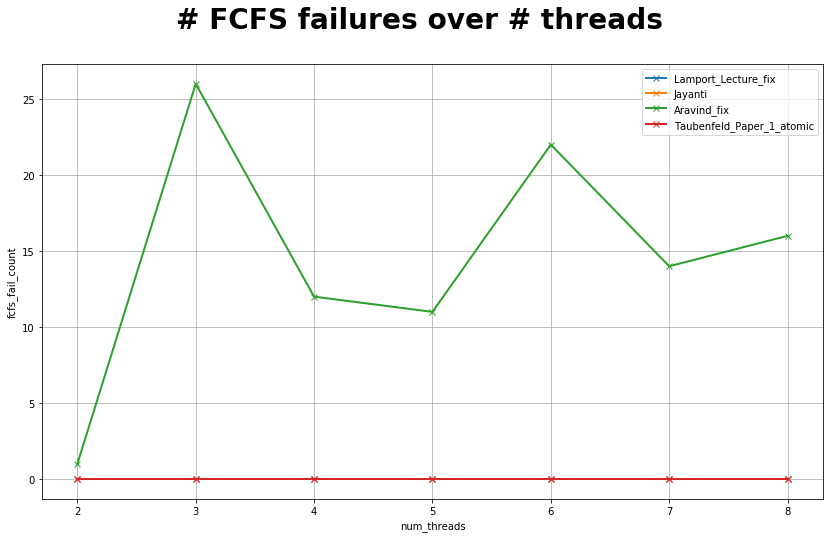

In [12]:
plot_col(df, x_col="num_threads", y_col="fcfs_fail_count", title="# FCFS failures over # threads", norm=False)
plt.savefig("plots/fcfs_fails")

# LRU failures over nthreads

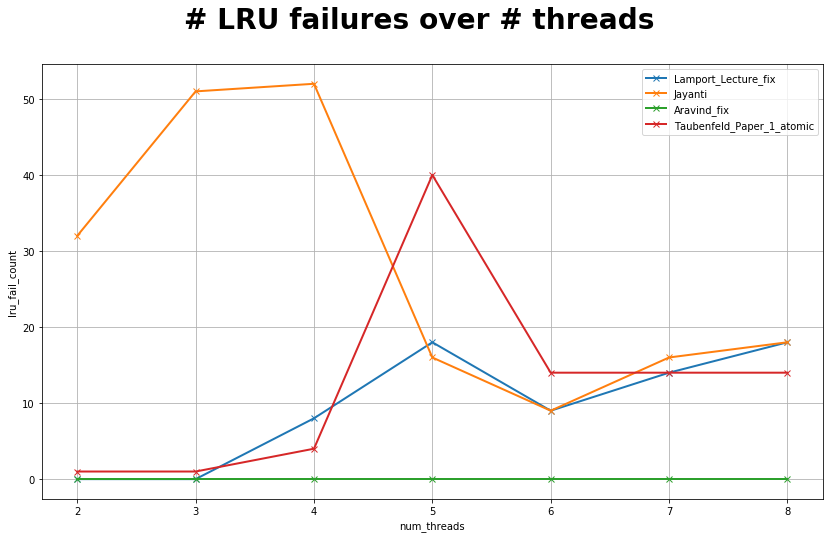

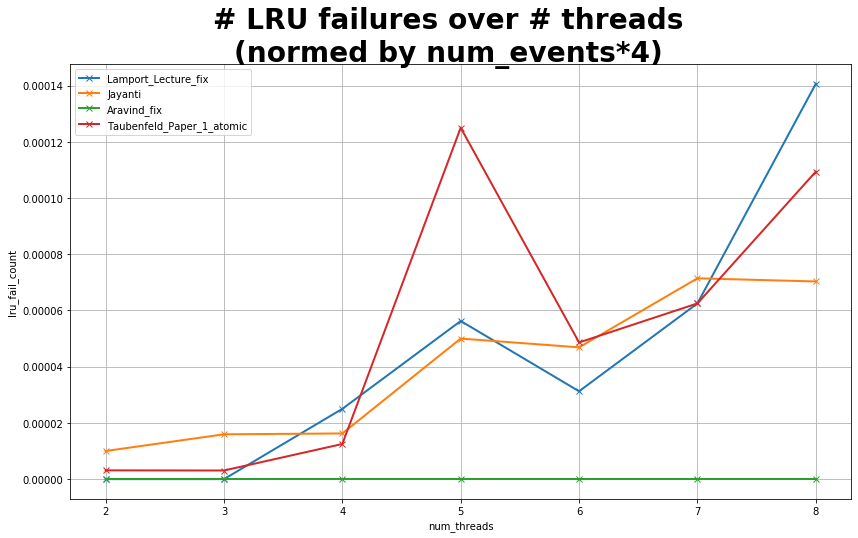

In [14]:
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads", norm=False)
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads\n(normed by num_events*4)", norm=True)

# Average number of contenders

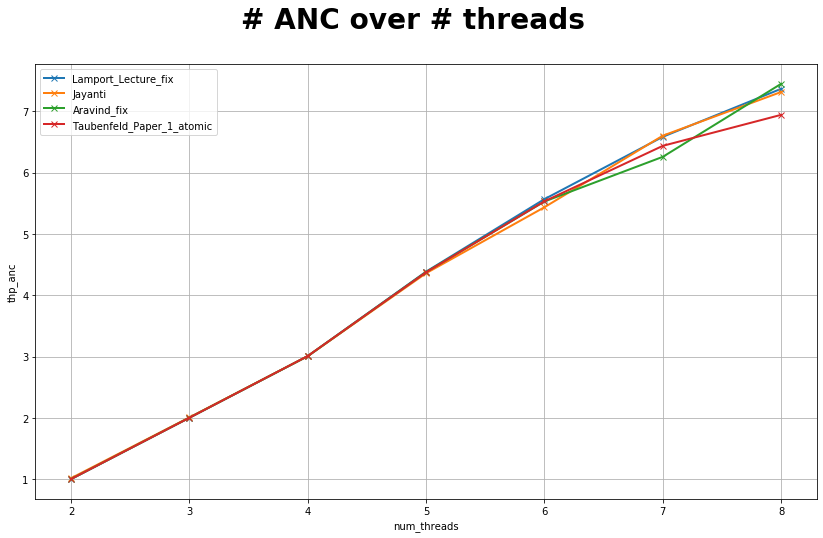

In [16]:
plot_col(df, x_col="num_threads", y_col="thp_anc", title="# ANC over # threads", norm=False)

# Throughput

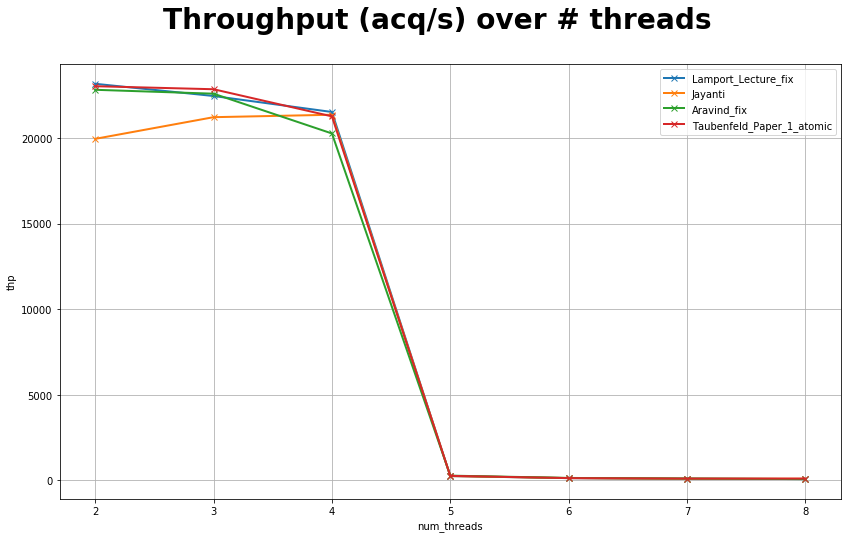

In [17]:
plot_col(df, x_col="num_threads", y_col="thp", title="Throughput (acq/s) over # threads", norm=False)

# Average number of contenders

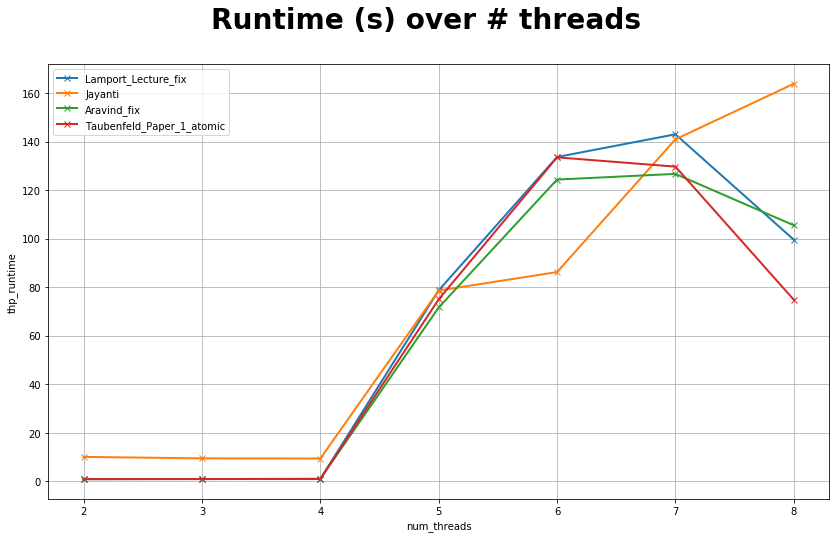

In [18]:
plot_col(df, x_col="num_threads", y_col="thp_runtime", title="Runtime (s) over # threads", norm=False)